# Virtual Environments and Requests Module

In [1]:
# sending a request and logging the response code 
import requests 

r = requests.get("https://api.github.com/users/Connor-SM")

print(r)
print(type(r))

<Response [200]>
<class 'requests.models.Response'>


In [2]:
# accessing the content that we requested from the URL

data = r.content
print(data)

b'{"login":"Connor-SM","id":20958711,"node_id":"MDQ6VXNlcjIwOTU4NzEx","avatar_url":"https://avatars.githubusercontent.com/u/20958711?v=4","gravatar_id":"","url":"https://api.github.com/users/Connor-SM","html_url":"https://github.com/Connor-SM","followers_url":"https://api.github.com/users/Connor-SM/followers","following_url":"https://api.github.com/users/Connor-SM/following{/other_user}","gists_url":"https://api.github.com/users/Connor-SM/gists{/gist_id}","starred_url":"https://api.github.com/users/Connor-SM/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/Connor-SM/subscriptions","organizations_url":"https://api.github.com/users/Connor-SM/orgs","repos_url":"https://api.github.com/users/Connor-SM/repos","events_url":"https://api.github.com/users/Connor-SM/events{/privacy}","received_events_url":"https://api.github.com/users/Connor-SM/received_events","type":"User","site_admin":false,"name":"Connor Milliken","company":"HubSpot, Inc.","blog":"www.connormilliken.c

In [3]:
# converting data from JSON into a Python dictionary and outputting all key-value pairs
data = r.json()  # converting the data from a string to a dictionary
for k, v in data.items():
    print("Key : {} \t Value: {}".format(k,v))
print(data["name"]) # accessing data directly

Key : login 	 Value: Connor-SM
Key : id 	 Value: 20958711
Key : node_id 	 Value: MDQ6VXNlcjIwOTU4NzEx
Key : avatar_url 	 Value: https://avatars.githubusercontent.com/u/20958711?v=4
Key : gravatar_id 	 Value: 
Key : url 	 Value: https://api.github.com/users/Connor-SM
Key : html_url 	 Value: https://github.com/Connor-SM
Key : followers_url 	 Value: https://api.github.com/users/Connor-SM/followers
Key : following_url 	 Value: https://api.github.com/users/Connor-SM/following{/other_user}
Key : gists_url 	 Value: https://api.github.com/users/Connor-SM/gists{/gist_id}
Key : starred_url 	 Value: https://api.github.com/users/Connor-SM/starred{/owner}{/repo}
Key : subscriptions_url 	 Value: https://api.github.com/users/Connor-SM/subscriptions
Key : organizations_url 	 Value: https://api.github.com/users/Connor-SM/orgs
Key : repos_url 	 Value: https://api.github.com/users/Connor-SM/repos
Key : events_url 	 Value: https://api.github.com/users/Connor-SM/events{/privacy}
Key : received_events_url 	

In [4]:
# outputting specific key-value pairs from data
r = requests.get("https://api.github.com/search/repositories?q=language:python")
data = r.json()
print(data["total_count"])     # output the total number of repositories that use python

9815924


# Pandas

In [5]:
# importing the pandas library
import pandas as pd # industry standard name of pd when importing

In [6]:
# using the from_dict method to convert a dictionary into a Pandas DataFrame
import random

random.seed(3)   # generate same random numbers every time, number used doesn't matter

names = ["Jess", "Jordan", "Sandy", "Ted", "Barney", "Tyler", "Rebecca"]
ages = [random.randint(18, 35) for x in range(len(names))]

people = {"names" : names, "ages" : ages}
df = pd.DataFrame.from_dict(people)
print(df)

     names  ages
0     Jess    25
1   Jordan    35
2    Sandy    22
3      Ted    29
4   Barney    33
5    Tyler    20
6  Rebecca    18


In [7]:
# directly selecting a column in Pandas
print(df["ages"])
print(df["ages"][3])   # select the value of the "ages" in the fourth row (0-index based)

# print( df[4] ) doesn't work, 4 is not a column name

0    25
1    35
2    22
3    29
4    33
5    20
6    18
Name: ages, dtype: int64
29


In [8]:
# directly selecting a record in Pandas using .loc
print(df.loc[0])

print(df.loc[0]["names"]) # selecting the value at record 0 in the "names" column

names    Jess
ages       25
Name: 0, dtype: object
Jess


In [9]:
# slicing a DataFrame to grab specific records
print(df[2:5])

    names  ages
2   Sandy    22
3     Ted    29
4  Barney    33


In [10]:
# accessing the top 5 records using .head()
df.head(5)

,names,ages
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33


In [11]:
# accessing the bottom 3 records using .tail()
df.tail(3)

,names,ages
4,Barney,33
5,Tyler,20
6,Rebecca,18


In [12]:
# accessing the column headers (keys) using the .keys() method
headers = df.keys()
print(headers)

Index(['names', 'ages'], dtype='object')


In [13]:
# checking the shape, which is the number of records columns
print(df.shape)

(7, 2)


In [14]:
# checking the general statistics of the DataFrame using. describe(), only works in numerical columns
df.describe()

,ages
count,7.000000
mean,26.000000
std,6.531973
min,18.000000
25%,21.000000
50%,25.000000
75%,31.000000
max,35.000000


In [15]:
# sort based on a given column, but keep the DataFrame intact using sort_values()
df = df.sort_values("ages")
df.head(5)

,names,ages
6,Rebecca,18
5,Tyler,20
2,Sandy,22
0,Jess,25
3,Ted,29


In [16]:
# using a conditional to create a true/false column to work with
can_drink = df["ages"] > 21
print(can_drink)

6    False
5    False
2     True
0     True
3     True
4     True
1     True
Name: ages, dtype: bool


In [17]:
# using subsetting to filer out records and keep DataFrame intact
df[df["ages"] > 21]

,names,ages
2,Sandy,22
0,Jess,25
3,Ted,29
4,Barney,33
1,Jordan,35


In [18]:
# generating a new column of fake data for each record in the DataFrame to represent customer tenure
random.seed(321)

tenure = [random.randint(0, 10) for x in range(len(df))]

df["tenure"] = tenure    # same as adding a new key-value pair in a dictionary
df.head()


,names,ages,tenure
6,Rebecca,18,4
5,Tyler,20,6
2,Sandy,22,2
0,Jess,25,5
3,Ted,29,8


In [19]:
# feature engineering a new column from known data using a UDF
def ageGroup(age):
    return "Teenager" if age < 21 else "Adult"
df["age_group"] = df["ages"].apply(ageGroup)
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult


In [20]:
# grouping the records together to count how many records in each group
df.groupby("age_group", as_index = False).count().head()

,age_group,names,ages,tenure
0,Adult,5,5,5
1,Teenager,2,2,2


In [21]:
# grouping the data to see averages of all columns
df.groupby("age_group", as_index = False).mean().head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_35200\3756306105.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("age_group", as_index = False).mean().head()


,age_group,ages,tenure
0,Adult,28.8,5.4
1,Teenager,19.0,5.0


In [22]:
# grouping information by their age group, then by their tenure
df.groupby(["age_group", "tenure"], as_index = False).count().head()

,age_group,tenure,names,ages
0,Adult,2,1,1
1,Adult,5,2,2
2,Adult,7,1,1
3,Adult,8,1,1
4,Teenager,4,1,1


In [23]:
# adding a record to the bottom of the DataFrane
df.loc[7] = ["Jess", 25, "Adult", 2]  # add a record
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult
7,Jess,25,Adult,2


In [24]:
# removing duplicates based on same names
df = df.drop_duplicates(subset = "names")
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult


In [25]:
# creating another fake DataFrame to work with, having same names and a new ratings column
ratings = {
    "names" : ["Jess", "Tyler", "Ted"],
    "ratings" : [10, 9, 6]
}
ratings = df.from_dict(ratings)
ratings.head()

,names,ratings
0,Jess,10
1,Tyler,9
2,Ted,6


In [26]:
# performing an inner join with our df and ratings DataFrames based on names, get data that matches
matched_ratings = df.merge(ratings, on = "names", how = "inner")
matched_ratings.head()

,names,ages,tenure,age_group,ratings
0,Tyler,20,6,Teenager,9
1,Jess,25,5,Adult,10
2,Ted,29,8,Adult,6


In [27]:
# performing an outer join with our df and ratings DataFrames based on names, get all data
all_ratings = df.merge(ratings, on = "names", how = "outer")
all_ratings.head()

,names,ages,tenure,age_group,ratings
0,Rebecca,18,4,Teenager,NaN
1,Tyler,20,6,Teenager,9.0
2,Sandy,22,2,Adult,NaN
3,Jess,25,5,Adult,10.0
4,Ted,29,8,Adult,6.0


# Matplotlib

In [28]:
# importing the matplotlib library 
from matplotlib import pyplot as plt   # industry standard name of plt when importing

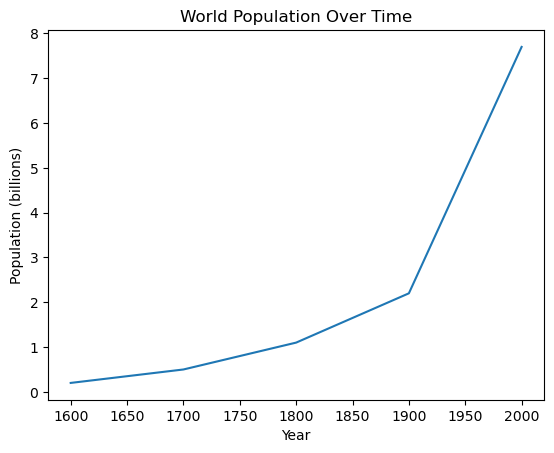

In [29]:
# creating a line plot using x and y coords
x, y = [1600, 1700, 1800, 1900, 2000] , [0.2, 0.5, 1.1, 2.2, 7.7]
plt.plot(x, y) # creates the line
plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")
plt.show()


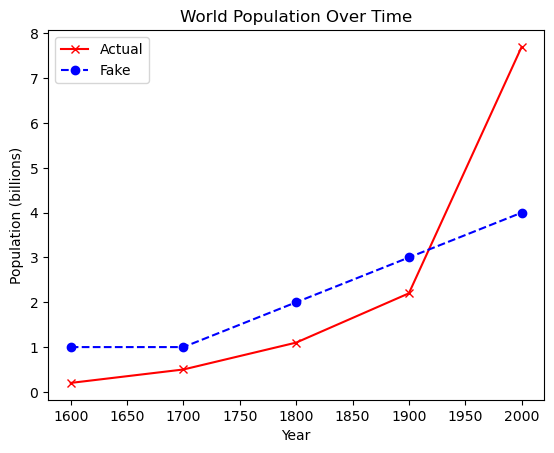

In [30]:
# creating a line plot with multiple lines

x1, y1 = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]
x2, y2 = [1600, 1700, 1800, 1900, 2000], [1, 1, 2, 3, 4]

plt.plot(x1, y1, "rx-", label = "Actual")   # create a red solid line with x dots
plt.plot(x2, y2, "bo--", label = "Fake")    # create a blue dashed line with circle dots

plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")
plt.legend()
plt.show()

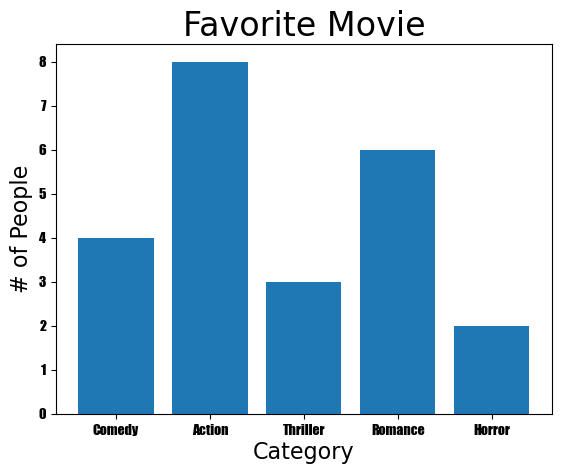

In [31]:
# creating a bar plot using x and y coords

num_people, categories = [4, 8, 3, 6, 2], ["Comedy", "Action", "Thriller", "Romance", "Horror"] 

plt.bar(categories, num_people)

plt.title("Favorite Movie", fontsize = 24)
plt.xlabel("Category", fontsize = 16)
plt.ylabel("# of People", fontsize = 16)
plt.xticks(fontname = "Fantasy")
plt.yticks(fontname = "Fantasy")

plt.show()

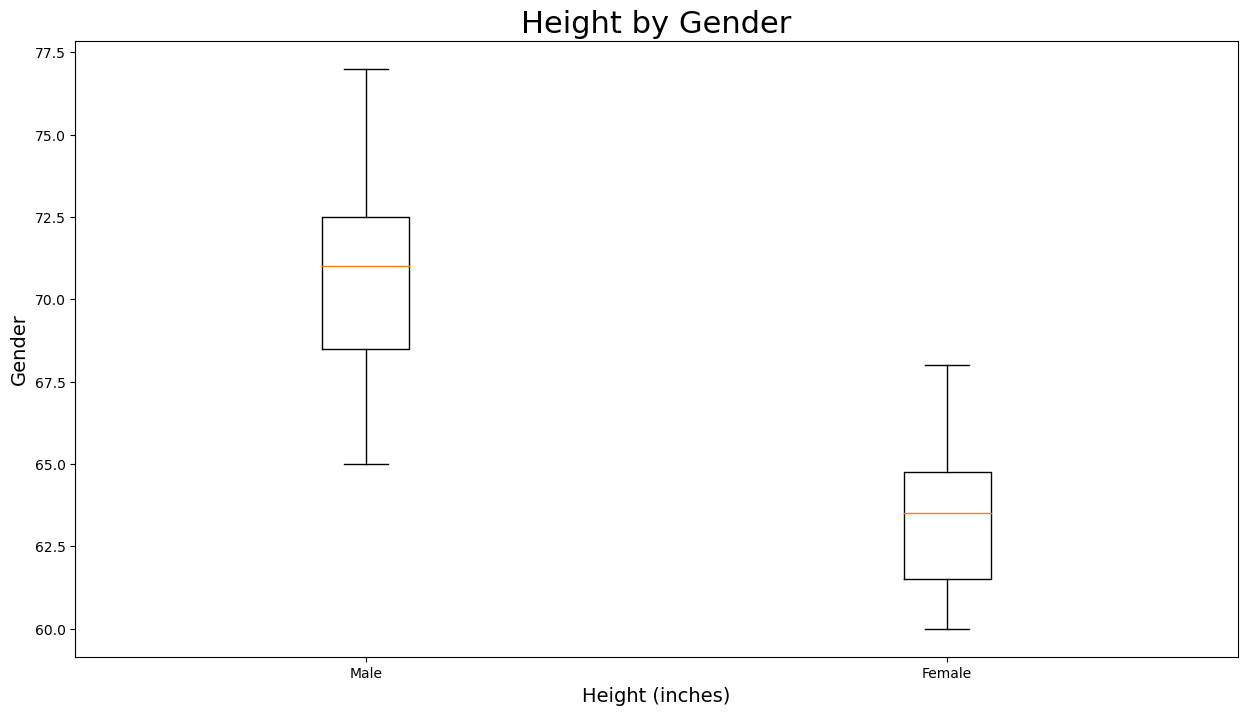

In [32]:
# creating a box plot - showing height data for male-female

males, females = [72, 68, 65, 77, 73, 71, 69], [60, 65, 68, 61, 63, 64]
heights = [males, females]

plt.figure(figsize = (15,8)) # makes charts bigger
plt.boxplot(heights)         # takes in list of data, each box is its' own array, heights contains lists

plt.xticks([1, 2], ["Male", "Female"]) # sets number of ticks and labels on x-axis
plt.title("Height by Gender", fontsize = 22)
plt.xlabel("Height (inches)", fontsize = 14)
plt.ylabel("Gender", fontsize = 14)

plt.show()

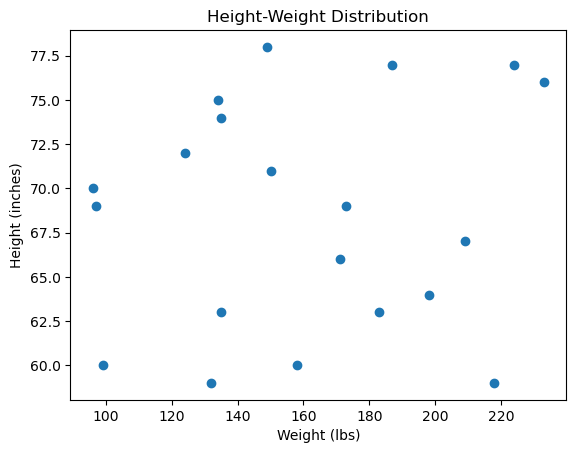

In [33]:
# creating a scatter plot to represent height-weight distribution
from random import randint
random.seed(2)

height = [randint(58, 78) for x in range(20)]  # 20 records between 4'10" and 6'6"
weight = [randint(90, 250) for x in range(20)] # 20 records between 90 lbs and 250 lbs

plt.scatter(weight, height)
plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")

plt.show()


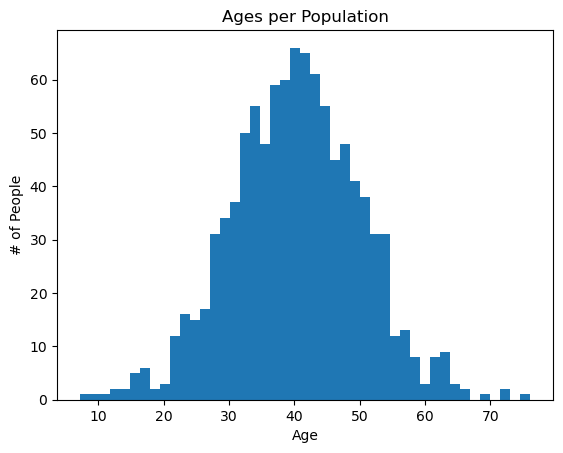

In [34]:
# creating a histogram to show age data for a fake population
import numpy as np   # import numpy module to generate data
np.random.seed(5)

ages = [np.random.normal(loc = 40, scale = 10) for x in range(1000)] # ages distributed around 40

plt.hist(ages, bins = 45)       # bins is the number of bars         

plt.title("Ages per Population")
plt.xlabel("Age")
plt.ylabel("# of People")

plt.show()

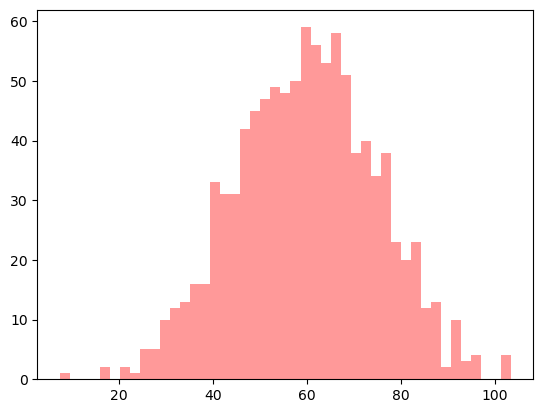

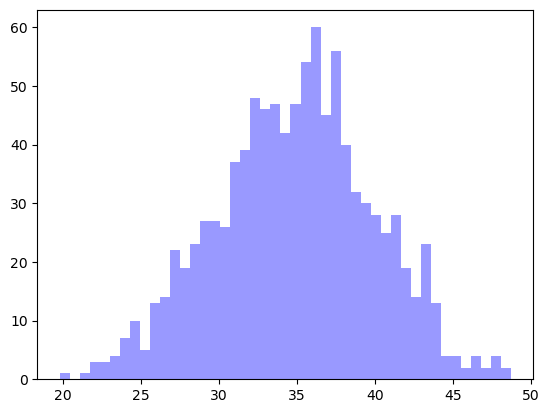

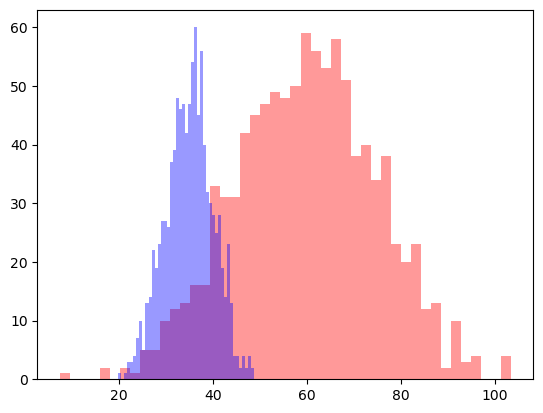

In [35]:
# showing the importance of histogram's to display central distribution

florida = [ np.random.normal(loc=60, scale=15) for x in range(1000) ]
california = [ np.random.normal(loc=35, scale=5) for x in range(1000) ]

# chart 1
plt.hist(florida, bins=45, color='r', alpha=0.4)
plt.show()

# chart 2
plt.hist(california, bins=45, color='b', alpha=0.4)
plt.show()


# chart 3
plt.hist(florida, bins=45, color='r', alpha=0.4)
plt.hist(california, bins=45, color='b', alpha=0.4)
plt.savefig('figure10-7.jpg')
plt.show()

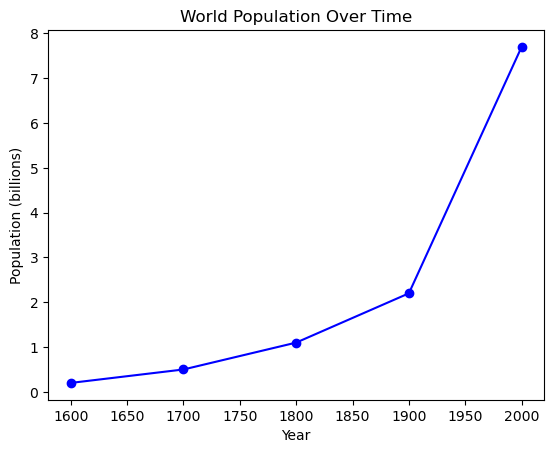

In [36]:
# using savefig method to save the chart as a jpg to the local folder
x, y = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]

plt.plot(x, y, 'bo-')    # creates the line

plt.title('World Population Over Time')
plt.xlabel('Year')
plt.ylabel('Population (billions)')

plt.savefig("population.jpg")

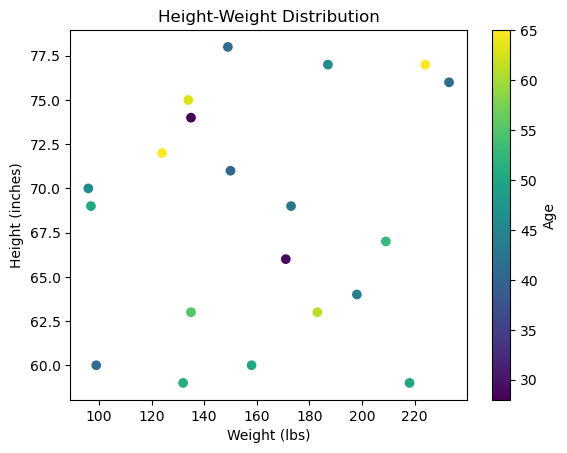

In [37]:
# creating a scatter plot to represent height-weight distribution
from random import randint
random.seed(2)

height = [ randint(58, 78) for x in range(20) ]   # 20 records between 4'10" and 6'8"
weight = [ randint(90, 250) for x in range(20) ]  # 20 records between 90lbs. and 250lbs.
age = [ randint(18, 65) for x in range(20) ]      # 20 records between 18 and 65 years old

plt.scatter(weight, height, c=age)

plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")
plt.colorbar(label="Age")      # adds color bar to right side

plt.show()

# Web Scraping

In [38]:
# importing the beautiful soup and requests library
from bs4 import BeautifulSoup
import requests

In [39]:
# performing a request and outputting the status code
page = requests.get("https://www.arthurleej.com/essays/e-love.html")
print(page)

<Response [200]>


In [40]:
# outputting the request response content
print(page.content)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n<html>\n<head>\n\t<title>Essay on Love by Arthur Lee Jacobson</title>\n<meta name="description" content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson.">\n<meta name="keywords" content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington">\n<meta name="resource-type" content="document">\n<meta name="generator" content="BBEdit 4.5">\n<meta name="robots" content="all">\n<meta name="classification" content="Gardening">\n<meta name="distribution" content="global">\n<meta name="rating" content="general">\n<meta name="copyright" content="2001 Arthur Lee Jacobson">\n<meta name="author" content="eriktyme@eriktyme.com">\n<meta name="language" content="en-us">\n</head>\n<body background="../images/background1a.jpg" bgcolor="#FFFFCC" text="#000000" link="

In [41]:
# importing the beautiful soup and requests library
from bs4 import BeautifulSoup
import requests

# performing a request and outputting the status code
page = requests.get("https://www.arthurleej.com/essays/e-love.html")

# turning the response into a BeautifulSoup object to extract data

soup = BeautifulSoup(page.content, 'html.parser')

print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>
   Essay on Love by Arthur Lee Jacobson
  </title>
  <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>
  <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>
  <meta content="document" name="resource-type"/>
  <meta content="BBEdit 4.5" name="generator"/>
  <meta content="all" name="robots"/>
  <meta content="Gardening" name="classification"/>
  <meta content="global" name="distribution"/>
  <meta content="general" name="rating"/>
  <meta content="2001 Arthur Lee Jacobson" name="copyright"/>
  <meta content="eriktyme@eriktyme.com" name="author"/>
  <meta content="en-us" name="language"/>
 </head>
 <body alink="#33CC33" background="../images/background1a.jpg

In [42]:
# using the find method to scrape the text within the first bold tag
title = soup.find("b")
print(title)
print(title.get_text()) # extracts all text within element

<b>Love</b>
Love


In [43]:
# get all text within the bold element tag then output each

poem_text = soup.find_all('b')

for text in poem_text:
    print(text.get_text())

Love
    Of the fourteen essays I'm writing, only this one treats an emotion. That love is the most important emotion is the deduction. I think other emotions may be as important, but are not so powerfully moving or interesting to most of us. Love is exciting. There is no need to justify choosing to write about it. Are not most songs love songs? Are not most novels stories featuring love?
    Love in its broad sense is the feeling of strong attraction, and often attachment and protection. It is felt towards other people, towards pets, towards inanimate objects, towards abstractions such as patriotism, religious matters, hobbies, and I suppose nearly everything. It is multifaceted, and includes ordinary self-love, chivalrous love, carnal or sexual love, friendly love, family love. It is an emotion that is closely related to certain others, such as hope. At its simplest level it is what we strongly like.
    I have a hunch that love, like the rose, owes much of its appeal to our mainstre

In [44]:
# finding an element by specific attribute key-values

page = requests.get('https://github.com/Connor-SM')

soup = BeautifulSoup(page.content, 'html.parser')

username = soup.find('span', attrs={ 'class' : 'vcard-username' })   # find first span with this class

print(username)   # will show that element has class of vcard-username among others
print(username.get_text())

<span class="p-nickname vcard-username d-block" itemprop="additionalName">
          Connor-SM

        </span>

          Connor-SM

        


In [45]:
# traversing through the DOM using Beautiful Soup - using the children attribute

page = requests.get("https://www.arthurleej.com/essays/e-love.html")

soup = BeautifulSoup(page.content, "html.parser")

print(soup.children)

In [46]:
# importing the beautiful soup and requests library
from bs4 import BeautifulSoup
import requests

# traversing through the DOM using Beautiful Soup - using the children attribute

page = requests.get("https://www.arthurleej.com/essays/e-love.html")

soup = BeautifulSoup(page.content, "html.parser")

# understanding the children within the soup object

for child in list(soup.children):
    print(type())

TypeError: type() takes 1 or 3 arguments

In [47]:
# accessing the .Tag object which holds the html - trying to access the title tag

html = list(soup.children)[2]

for section in html:
    print("\n\n Start of new section")
    print(section)



 Start of new section




 Start of new section
<head>
<title>Essay on Love by Arthur Lee Jacobson</title>
<meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>
<meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>
<meta content="document" name="resource-type"/>
<meta content="BBEdit 4.5" name="generator"/>
<meta content="all" name="robots"/>
<meta content="Gardening" name="classification"/>
<meta content="global" name="distribution"/>
<meta content="general" name="rating"/>
<meta content="2001 Arthur Lee Jacobson" name="copyright"/>
<meta content="eriktyme@eriktyme.com" name="author"/>
<meta content="en-us" name="language"/>
</head>


 Start of new section




 Start of new section
<body alink="#33CC33" background="../images/background1a.

In [48]:
# accessing the head element using the children attribute
head = list(html.children)[1]

for item in head:
    print("\n\n New Tag")
    print(item)



 New Tag




 New Tag
<title>Essay on Love by Arthur Lee Jacobson</title>


 New Tag




 New Tag
<meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>


 New Tag




 New Tag
<meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>


 New Tag




 New Tag
<meta content="document" name="resource-type"/>


 New Tag




 New Tag
<meta content="BBEdit 4.5" name="generator"/>


 New Tag




 New Tag
<meta content="all" name="robots"/>


 New Tag




 New Tag
<meta content="Gardening" name="classification"/>


 New Tag




 New Tag
<meta content="global" name="distribution"/>


 New Tag




 New Tag
<meta content="general" name="rating"/>


 New Tag




 New Tag
<meta content="2001 Arthur Lee Jacobson" name="copyright"/>


 New Tag




 New Tag
<m

In [49]:
# scraping the title text

title = list(head)[1]

print(title.string)
print(type(title.string))
print(title.get_text())

Essay on Love by Arthur Lee Jacobson
<class 'bs4.element.NavigableString'>
Essay on Love by Arthur Lee Jacobson


# Friday Project: Website Analysis

In [50]:
# accept input from user on which site they want to search on
# request site content
# parse out bad/useless words
# throw word count into dictionary
# use bar plot to showcase top 5 words
# use https://www.microsoft.com/en-us/

In [51]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output

In [ ]:
# graph results of top 7 words
def displayResults(words, site):
    count = [item[1] for item in words][::-1]     # reverses order
    word = [item[0] for item in words][::-1]      # reverses order
    
    plt.figure(figsize=(20, 10))   # define how large the figure appears

    plt.bar(word, count)

    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)

    plt.savefig('microsoft.png')
    plt.show()
    
# filter article words and hidden characters
def filterWaste(word):
    bad_words = ('the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his')
    
    if word.lower() in bad_words:
        return False
    else:
        return True
    
# filter out all elements that do not contain text that appears on site
def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True

# request site and top 7 most used words
def scrape(site):    
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    text = soup.find_all(text=True)     # will get all text within the document
    
    visible_text = filter(filterTags, text)
    
    word_count = {}

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')   # replace all hidden chars

        words = list(filter(filterWaste, words))
        
        for word in words:
            if word != '':
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                     
    word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)        
    
    return word_count[:7]
            
# main loop should ask if user wants to scrape, then what site to scrape
while input('Would you like to scrape a website (y/n)? ') == 'y':
    try:
        clear_output()
    
        site = input('Enter a website to analyze: ')
    
        top_words = scrape(site)
        
        top_word = top_words[0]   # tuple of (word, count)
        
        print("The top word is: {}".format(top_word[0]))
        
        displayResults(top_words, site)
    except:
        print('Something went wrong, please try again.')
    
print('Thanks for analyzing! Come back again!')

# Monday Exercises - Answers

1. Test Environment: Create a new virtual environment called “test.” When creating it, install Python version 2.7 instead of the current version. After it’s completed, make sure it installed the proper version of Python by checking the list.

In [ ]:
# done in terminal

2. JavaScript Repositories: Using the requests module and the Github API link in our last lesson, figure out how many repositories on Github use JavaScript.

In [ ]:
# outputting specific key-value pairs from data
r = requests.get("https://api.github.com/search/repositories?q=language:javascript")
data = r.json()
print(data["total_count"])     # output the total number of repositories that use python

# Tuesday Exercises - Answers

1. Loading a Dataset: Go to www.Kaggle.com, click “Datasets” in the top bar menu. Choose a dataset that you like, and download it into the “python_bootcamp” folder. Then, load the dataset into a Pandas DataFrame using the read_csv method, and display the top five records.

In [ ]:
import pandas as pd

file = 'AB_NYC_2019.csv'

df = pd.read_csv(file)

df.head(5)

2. Dataset Analysis: This is an open-ended exercise. Run some analysis on the dataset you chose from exercise #1. Try to answer questions like these:

a. How many records are there?
b. What are the data types of each column?
c. Are there duplicate records or columns?
d. Is there missing data?
e. Is there a correlation between two or more columns?

In [ ]:
# open ended

# Wednesday Exercises - Answers

1. Three Line Plot: Create three random lists of data that have 20 numbers between 1 and 10. Then create a line plot with three lines, one for each list. Give each line their own color, dot symbol, and line style.

In [ ]:
from matplotlib import pyplot as plt
import random

nums1 = sorted([random.randint(1, 11) for x in range(20)])
nums2 = sorted([random.randint(1, 11) for x in range(20)])
nums3 = sorted([random.randint(1, 11) for x in range(20)])

points = [x for x in range(1, 21)]

plt.plot(nums1, points, 'bo:')
plt.plot(nums2, points, 'go--')
plt.plot(nums3, points, 'ro-')

plt.show()

2. User Information: Create a program that asks any number of users to give a rating between 1 and 5 stars and plots a bar chart of the data when no more users would like to answer. Use the following text as an example of what to ask:

>>> What would you rate this movie (1-5)? 4
>>> Is there another user that would like to review (y/n)? y
>>> What would you rate this movie (1-5)? 5
>>> Is there another user that would like to review (y/n)? n
*** bar plot renders with two categories and two ratings ***

In [ ]:
def createGraph(data, movie):
    categories = [k for k in data.keys()]
    ratings_per_category = [v for v in data.values()]
    
    plt.bar(categories, ratings_per_category)

    plt.title("{}".format(movie.title()), fontsize=24)
    plt.xlabel("Rating", fontsize=16)
    plt.ylabel("# of People", fontsize=16)
    plt.xticks(fontname="Fantasy")
    plt.yticks(fontname="Fantasy")

    plt.show()

def main():
    data = {}
    
    movie = input('What movie are you rating? ')
    
    while input('Is there another user that would like to review (y/n)? ') == 'y':
        try:
            ans = int(input('What would you rate this movie (1-5)? '))
            
            if ans in data:
                data[ans] += 1   # add to the category in the dictionary
            else:
                data[ans] = 1
        except:
            clear_output()
            print("Something went wrong, try again!")
            
    createGraph(data, movie)
    
main()

# Thursday Exercises - Answers

1. Word Count: Write a program that counts how many words are in the following link: www.york.ac.uk/teaching/cws/wws/webpage1.html. Use the requests module and Beautiful Soup library to extract all text.

In [ ]:
from bs4 import BeautifulSoup
import requests
from bs4.element import Comment

page = requests.get('https://www.york.ac.uk/teaching/cws/wws/webpage1.html')

soup = BeautifulSoup(page.content, 'html.parser')


texts = soup.findAll(text=True)

count = 0

for text in texts:
    words = text.replace('\n', '').replace('\t', '').split(' ')
            
    for word in words:
        if word not in ['', '.', '-']:
            count += 1
            
print(count)

2. Question #2: Using the following link, extract every stadium name out of the table: https://en.wikipedia.org/wiki/List_of_current_National_Football_League_stadiums. There should be 32 total names.

In [ ]:
from bs4 import BeautifulSoup
import requests

page = requests.get('https://en.wikipedia.org/wiki/List_of_current_National_Football_League_stadiums')

soup = BeautifulSoup(page.content, 'html.parser')

nfl_stadiums_table = soup.findAll('table')[1]

tbody = list(nfl_stadiums_table.children)[1]

stadiums = [] 

for i in range(1, len(list(tbody.children))):
    row = list(tbody.children)[i]
    
    th = row.find('th')
    
    try:
        stadium_name = th.get_text()
        stadiums.append(stadium_name)
    except:
        pass
    
for stadium in stadiums:
    print(stadium)
    
print(len(stadiums))  # should be 31, two teams share a field

# End of Week Exercises - Answers

1. User Input: As we saw in our Friday project, there were many article words or characters that we wanted to filter out. Unfortunately, we can’t keep track of all of them for each site. For this challenge, implement a block of code that asks the users what additional words or characters they would like to filter out so that they may alter the words shown.

In [ ]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output

# graph results of top 7 words
def displayResults(words, site):
    count = [item[1] for item in words][::-1]     # reverses order
    word = [item[0] for item in words][::-1]      # reverses order
    
    plt.figure(figsize=(20, 10))   # define how large the figure appears

    plt.bar(word, count)

    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)

    plt.savefig('microsoft.png')
    plt.show()    
    
# filter out all elements that do not contain text that appears on site
def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True

# request site and top 7 most used words
def scrape(site):    
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    text = soup.find_all(text=True)     # will get all text within the document
    
    visible_text = filter(filterTags, text)
    
    word_count = {}
    
    bad_words = set(['the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his'])
    
    print('\nThis is a list of words currently being filtered:')
    print(bad_words)
    
    while input('\nWould you like to filter any others? ').lower() != 'no':
        print('\nThis is a list of words currently being filtered:')
        print(bad_words)
        
        word = input('What word would you like to filter? ')

        bad_words.add(word)

        clear_output()

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')   # replace all hidden chars
    
        words = list(filter(lambda word: True if word.lower() not in bad_words else False, words))
        
        for word in words:
            if word != '':
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                     
    word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)        
    
    return word_count[:7]
            
# main loop should ask if user wants to scrape, then what site to scrape
while input('Would you like to scrape a website (y/n)? ') == 'y':
    try:
        clear_output()
    
        site = input('Enter a website to analyze: ')
    
        top_words = scrape(site)
        
        top_word = top_words[0]   # tuple of (word, count)
        
       
        print("The top word is: {}".format(top_word[0]))
        
        displayResults(top_words, site)
    except:
        print('Something went wrong, please try again.')
    
print('Thanks for analyzing! Come back again!')

2. Saving the Plot: Implement a block of code that asks the user if they would like to save the file. If they do, be sure to ask the user what they would like to call the image and save it with that name.

In [ ]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output

# graph results of top 7 words
def displayResults(words, site):
    count = [item[1] for item in words][::-1]     # reverses order
    word = [item[0] for item in words][::-1]      # reverses order
    
    plt.figure(figsize=(20, 10))   # define how large the figure appears

    plt.bar(word, count)

    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)
    
    ans = input('Would you like to save this image (y/n)? ').lower()
    
    if ans == 'y':
        print('Please provide the name and extension, ex: "image.png"...')
        
        filename = input('What would you like to call the chart? ')
        
        plt.savefig(filename)
        
        print('File saved!')
        
    plt.show()
    
# filter out all elements that do not contain text that appears on site
def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True

# request site and top 7 most used words
def scrape(site):    
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    text = soup.find_all(text=True)     # will get all text within the document
    
    visible_text = filter(filterTags, text)
    
    word_count = {}
    
    bad_words = set(['the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his'])
    
    print('\nThis is a list of words currently being filtered:')
    print(bad_words)
    
    while input('\nWould you like to filter any others? ').lower() != 'no':
        print('\nThis is a list of words currently being filtered:')
        print(bad_words)
        
        word = input('What word would you like to filter? ')

        bad_words.add(word)

        clear_output()

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')   # replace all hidden chars
    
        words = list(filter(lambda word: True if word.lower() not in bad_words else False, words))
        
        for word in words:
            if word != '':
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                     
    word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)        
    
    return word_count[:7]
            
# main loop should ask if user wants to scrape, then what site to scrape
while input('Would you like to scrape a website (y/n)? ') == 'y':
    try:
        clear_output()
    
        site = input('Enter a website to analyze: ')
    
        top_words = scrape(site)
        
        top_word = top_words[0]   # tuple of (word, count)
        
       
        print("The top word is: {}".format(top_word[0]))
        
        displayResults(top_words, site)
    except:
        print('Something went wrong, please try again.')
    
print('Thanks for analyzing! Come back again!')

3. Pandas Implementation: Rather than using a dictionary to track the words from the website scrape in our Project, implement Pandas into the code to track the information. You should be able to perform a head or tail function to see the top or bottom most frequently used words.

In [ ]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
import pandas as pd
from IPython.display import clear_output

# graph results of top 7 words
def displayResults(words, site):
    count = [num for num in words['Frequency']][::-1]     # reverses order
    word = [word for word in words['Word']][::-1]      # reverses order
    
    plt.figure(figsize=(20, 10))   # define how large the figure appears

    plt.bar(word, count)

    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)
    
    ans = input('Would you like to save this image (y/n)? ').lower()
    
    if ans == 'y':
        print('Please provide the name and extension, ex: "image.png"...')
        
        filename = input('What would you like to call the chart? ')
        
        plt.savefig(filename)
        
        print('File saved!')
        
    plt.show()
    
# filter out all elements that do not contain text that appears on site
def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True

# request site and top 7 most used words
def scrape(site):    
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    text = soup.find_all(text=True)     # will get all text within the document
    
    visible_text = filter(filterTags, text)
    
    word_count = {}
    
    bad_words = set(['the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his'])
    
    print('\nThis is a list of words currently being filtered:')
    print(bad_words)
    
    while input('\nWould you like to filter any others? ').lower() != 'no':
        print('\nThis is a list of words currently being filtered:')
        print(bad_words)
        
        word = input('What word would you like to filter? ')

        bad_words.add(word)

        clear_output()

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')   # replace all hidden chars
    
        words = list(filter(lambda word: True if word.lower() not in bad_words else False, words))
        
        for word in words:
            if word != '':
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                    
    words = [word for word in word_count.keys()]
    frequency = [word for word in word_count.values()]
                             
    df = pd.DataFrame.from_dict({ 'Word' : words, 'Frequency' : frequency })
    
    df = df.sort_values('Frequency', ascending=False).reset_index(drop=True)
    
    return df
            
# main loop should ask if user wants to scrape, then what site to scrape
while input('Would you like to scrape a website (y/n)? ') == 'y':
    try:
        clear_output()

        site = input('Enter a website to analyze: ')

        df = scrape(site)

        print(df.head(7))

        top_word = df.loc[0]['Word']
        top_words = df[0:7]

        print("The top word is: {}".format(top_word))

        displayResults(top_words, site)
    except:
        print('Something went wrong, please try again.')
    
print('Thanks for analyzing! Come back again!')

4. Saving the Data: After implementing Pandas to save the unique words and their frequency, output the information to a CSV for each site. The name of the file should represent the web site name: e.g. “microsoft_frequent_words.csv”.

In [ ]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
import pandas as pd
from IPython.display import clear_output

def saveCSVData(df, site):        
    site_name = site.split('.')[1]

    name = 'site_data/{}_frequent_words.csv'.format(site_name)
    
    df.to_csv(name)

# graph results of top 7 words
def displayResults(words, site):
    count = [num for num in words['Frequency']][::-1]     # reverses order
    word = [word for word in words['Word']][::-1]      # reverses order
    
    plt.figure(figsize=(20, 10))   # define how large the figure appears

    plt.bar(word, count)

    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)
    
    ans = input('Would you like to save this image (y/n)? ').lower()
    
    if ans == 'y':
        print('Please provide the name and extension, ex: "image.png"...')
        
        filename = input('What would you like to call the chart? ')
        
        plt.savefig(filename)
        
        print('File saved!')
        
    plt.show()
    
# filter out all elements that do not contain text that appears on site
def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True

# request site and top 7 most used words
def scrape(site):    
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    text = soup.find_all(text=True)     # will get all text within the document
    
    visible_text = filter(filterTags, text)
    
    word_count = {}
    
    bad_words = set(['the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his'])
    
    print('\nThis is a list of words currently being filtered:')
    print(bad_words)
    
    while input('\nWould you like to filter any others? ').lower() != 'no':
        print('\nThis is a list of words currently being filtered:')
        print(bad_words)
        
        word = input('What word would you like to filter? ')

        bad_words.add(word)

        clear_output()

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')   # replace all hidden chars
    
        words = list(filter(lambda word: True if word.lower() not in bad_words else False, words))
        
        for word in words:
            if word != '':
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                     
    words = [word for word in word_count.keys()]
    frequency = [word for word in word_count.values()]
                             
    df = pd.DataFrame.from_dict({ 'Word' : words, 'Frequency' : frequency })
    
    df = df.sort_values('Frequency', ascending=False).reset_index(drop=True)
    
    return df
            
# main loop should ask if user wants to scrape, then what site to scrape
while input('Would you like to scrape a website (y/n)? ') == 'y':
    try:
        clear_output()

        site = input('Enter a website to analyze: ')

        df = scrape(site)

        print(df.head(7))

        top_word = df.loc[0]['Word']
        top_words = df[0:7]

        print("The top word is: {}".format(top_word))

        displayResults(top_words, site)
        
        saveCSVData(df, site)
    except:
        print('Something went wrong, please try again.')
    
print('Thanks for analyzing! Come back again!')